In [1]:
import os
import sys
os.chdir('../')
new_current_dir = os.getcwd()  # get new current working directory
print("New current directory:", new_current_dir)
sys.path.append('./src/python/')

# import
from preamble.preamble import *
from gamma.gamma import GammaNPP
from gamma.rules import make_rules, Rules, readable_rules
from gamma.common import npp_from_json, set_of_frozenset
from plot.plot_function import *

New current directory: /home/fiftyfour/Documents/NetworkPricingGraphContraction


In [2]:
with open('./tmp/result_original.pkl', 'rb') as f:
    original_result = pickle.load(f)

In [3]:
cols_header = list(original_result['d30-01'].keys())
cols_header.remove('edge')
rows_header = list(original_result.keys())

original_meta_data = [
                [r[k] for k in cols_header] for r in original_result.values()
            ]
original_meta_data = pd.DataFrame(original_meta_data, index=rows_header,columns=cols_header)
original_meta_data['finish'] = original_meta_data['finish'].astype(bool)
original_meta_data['finish'] = original_meta_data['finish'].astype(int)

# tmp = meta_data_df[(meta_data_df['finish']==1) & (meta_data_df['solve_time']<=float(1000))]
# Creating a config for the server
# config = {}
# for pb_name, row in tmp.iterrows():
#     sh_time_limit = int(round(row['solve_time'] + 100,0)) # sec
#     config[pb_name] = sh_time_limit

# with open('./result/time_limit_config.pkl', 'wb') as f:
#     pickle.dump(config, f)

In [34]:
# data on one problem
problem_name = 'd30-01'
result = {}
with open(f'./tmp/result_{problem_name}.pkl', 'rb') as f:
    result[f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}'] = original_result[problem_name]
    result.update(pickle.load(f))
    
rows_header = list(map(lambda x: x[0], result[f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}']['edge']))
cols_header = list(result.keys())
edge_index_data = [      
                    [ r['edge'][i][1] for r in result.values() ] 
                    for i,_ in enumerate(rows_header)   
                ]
edge_value_data = [      
                    [ r['edge'][i][2] for r in result.values() ] 
                    for i,_ in enumerate(rows_header)   
                ]

flow_value_data = [      
                    [ r['edge'][i][3] for r in result.values() ] 
                    for i,_ in enumerate(rows_header)   
                ]
# Table of the form
#  edge v1 v2 v3 v4 ....
#   e1  o11
#   e2  o21
#   e3  ...
# ....
edge_index_df = pd.DataFrame(edge_index_data, index = rows_header, columns=cols_header)
edge_value_df = pd.DataFrame(edge_value_data, index = rows_header, columns=cols_header)
flow_value_df = pd.DataFrame(flow_value_data, index = rows_header, columns=cols_header)


## meta_data
# df of the form
#  pb v1 v2 v3 v4 ....
#   p1  o11
#   p2  o21
#   p3  ...
# ....

cols_header = list(result[f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}'].keys())
cols_header.remove('edge')
rows_header = list(result.keys())

meta_data = [
                [r[k] for k in cols_header] for r in result.values()
            ]
meta_data_df = pd.DataFrame(meta_data, index=rows_header,columns=cols_header)
meta_data_df[['min_sl', 'max_sl', 'm', 'H4']] = meta_data_df[['min_sl', 'max_sl', 'm', 'H4']].astype(int)
meta_data_df['finish'] = meta_data_df['finish'].astype(bool)
meta_data_df['finish'] = meta_data_df['finish'].astype(int)

In [40]:
edge_index_df

,000000-000000-0-0-0-0-0-0-0-0-0-d30-01,000093-50-2-2-4-1-1-1-1-1500-d30-01,000836-50-5-5-2-1-1-1-0-1500-d30-01,000895-50-2-5-0-1-1-1-0-1500-d30-01,000928-50-2-0-0-1-1-1-0-1500-d30-01,000046-50-2-2-3-1-1-1-1-1500-d30-01,000830-50-5-5-2-1-1-1-0-1500-d30-01,000269-50-4-4-3-1-1-1-1-1500-d30-01,000043-50-2-2-3-1-1-1-1-1500-d30-01,000248-50-3-3-5-1-1-1-1-1500-d30-01,...,000292-50-4-4-3-1-1-1-1-1500-d30-01,000052-50-2-2-3-1-1-1-1-1500-d30-01,000168-50-2-2-7-1-1-1-1-1500-d30-01,000124-50-2-2-5-1-1-1-1-1500-d30-01,000735-50-3-3-5-1-1-1-0-1500-d30-01,000109-50-2-2-4-1-1-1-1-1500-d30-01,000233-50-3-3-5-1-1-1-1-1500-d30-01,000828-50-5-5-2-1-1-1-0-1500-d30-01,000657-50-3-3-3-1-1-1-0-1500-d30-01,000173-50-2-2-7-1-1-1-1-1500-d30-01
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
21,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
22,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
47,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,806,804,802,805,800,805,802,805,805,805,...,804,803,805,804,804,805,805,798,804,802
807,807,805,803,806,801,806,803,806,806,806,...,805,804,806,805,805,806,806,799,805,803
813,813,811,809,812,807,812,809,812,812,812,...,811,810,812,811,811,812,812,805,811,809
815,815,813,811,814,809,814,811,814,814,814,...,813,812,814,813,813,814,814,807,813,811


In [5]:
edge_value_df
flow_value_df
meta_data_df

meta_data_df[meta_data_df['H4']==1]

,obj_value,preprocess_time,solve_time,n_vertex,n_edge,n_tolled,compression_factors,rewind_optimal_1,rewind_time_1,rewind_optimal_2,...,finish,n,min_sl,max_sl,m,H1,H2,H3,H4,max_attemp
000093-50-2-2-4-1-1-1-1-1500-d30-01,124099.000000,3.231483,231.997887,142,832,164,"{1: 1.0024038461538463, 2: 1.0140845070422535,...",74403,0.020235,74911,...,True,50,2,2,4,1,1,1,1,1500
000046-50-2-2-3-1-1-1-1-1500-d30-01,124682.000000,2.250624,163.449398,143,833,165,"{1: 1.0012004801920769, 2: 1.006993006993007, ...",115604,0.024782,115604,...,True,50,2,2,3,1,1,1,1,1500
000269-50-4-4-3-1-1-1-1-1500-d30-01,121058.000000,1.856313,371.649764,143,833,165,"{1: 1.0012004801920769, 2: 1.006993006993007, ...",91297,0.021417,91297,...,False,50,4,4,3,1,1,1,1,1500
000043-50-2-2-3-1-1-1-1-1500-d30-01,119813.000000,1.679444,343.286155,143,833,165,"{1: 1.0012004801920769, 2: 1.006993006993007, ...",101925,0.024787,101925,...,True,50,2,2,3,1,1,1,1,1500
000248-50-3-3-5-1-1-1-1-1500-d30-01,121224.000000,3.418035,284.938128,143,833,165,"{1: 1.0012004801920769, 2: 1.006993006993007, ...",110241,0.021983,110241,...,True,50,3,3,5,1,1,1,1,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000168-50-2-2-7-1-1-1-1-1500-d30-01,124682.000000,2.261616,149.164951,143,833,165,"{1: 1.0012004801920769, 2: 1.006993006993007, ...",117366,0.025693,117366,...,True,50,2,2,7,1,1,1,1,1500
000124-50-2-2-5-1-1-1-1-1500-d30-01,121271.000000,2.538857,187.737412,142,832,164,"{1: 1.0024038461538463, 2: 1.0140845070422535,...",103266,0.021670,103266,...,True,50,2,2,5,1,1,1,1,1500
000109-50-2-2-4-1-1-1-1-1500-d30-01,121058.000000,1.829847,371.431096,143,833,165,"{1: 1.0012004801920769, 2: 1.006993006993007, ...",91297,0.021717,91297,...,False,50,2,2,4,1,1,1,1,1500
000233-50-3-3-5-1-1-1-1-1500-d30-01,118435.001494,3.254612,214.832870,143,833,165,"{1: 1.0012004801920769, 2: 1.006993006993007, ...",118666,0.025423,118666,...,True,50,3,3,5,1,1,1,1,1500


/home/fiftyfour/Documents/NetworkPricingGraphContraction/src/python/plot/plot_function.py:329: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/home/fiftyfour/Documents/NetworkPricingGraphContraction/src/python/plot/plot_function.py:343: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


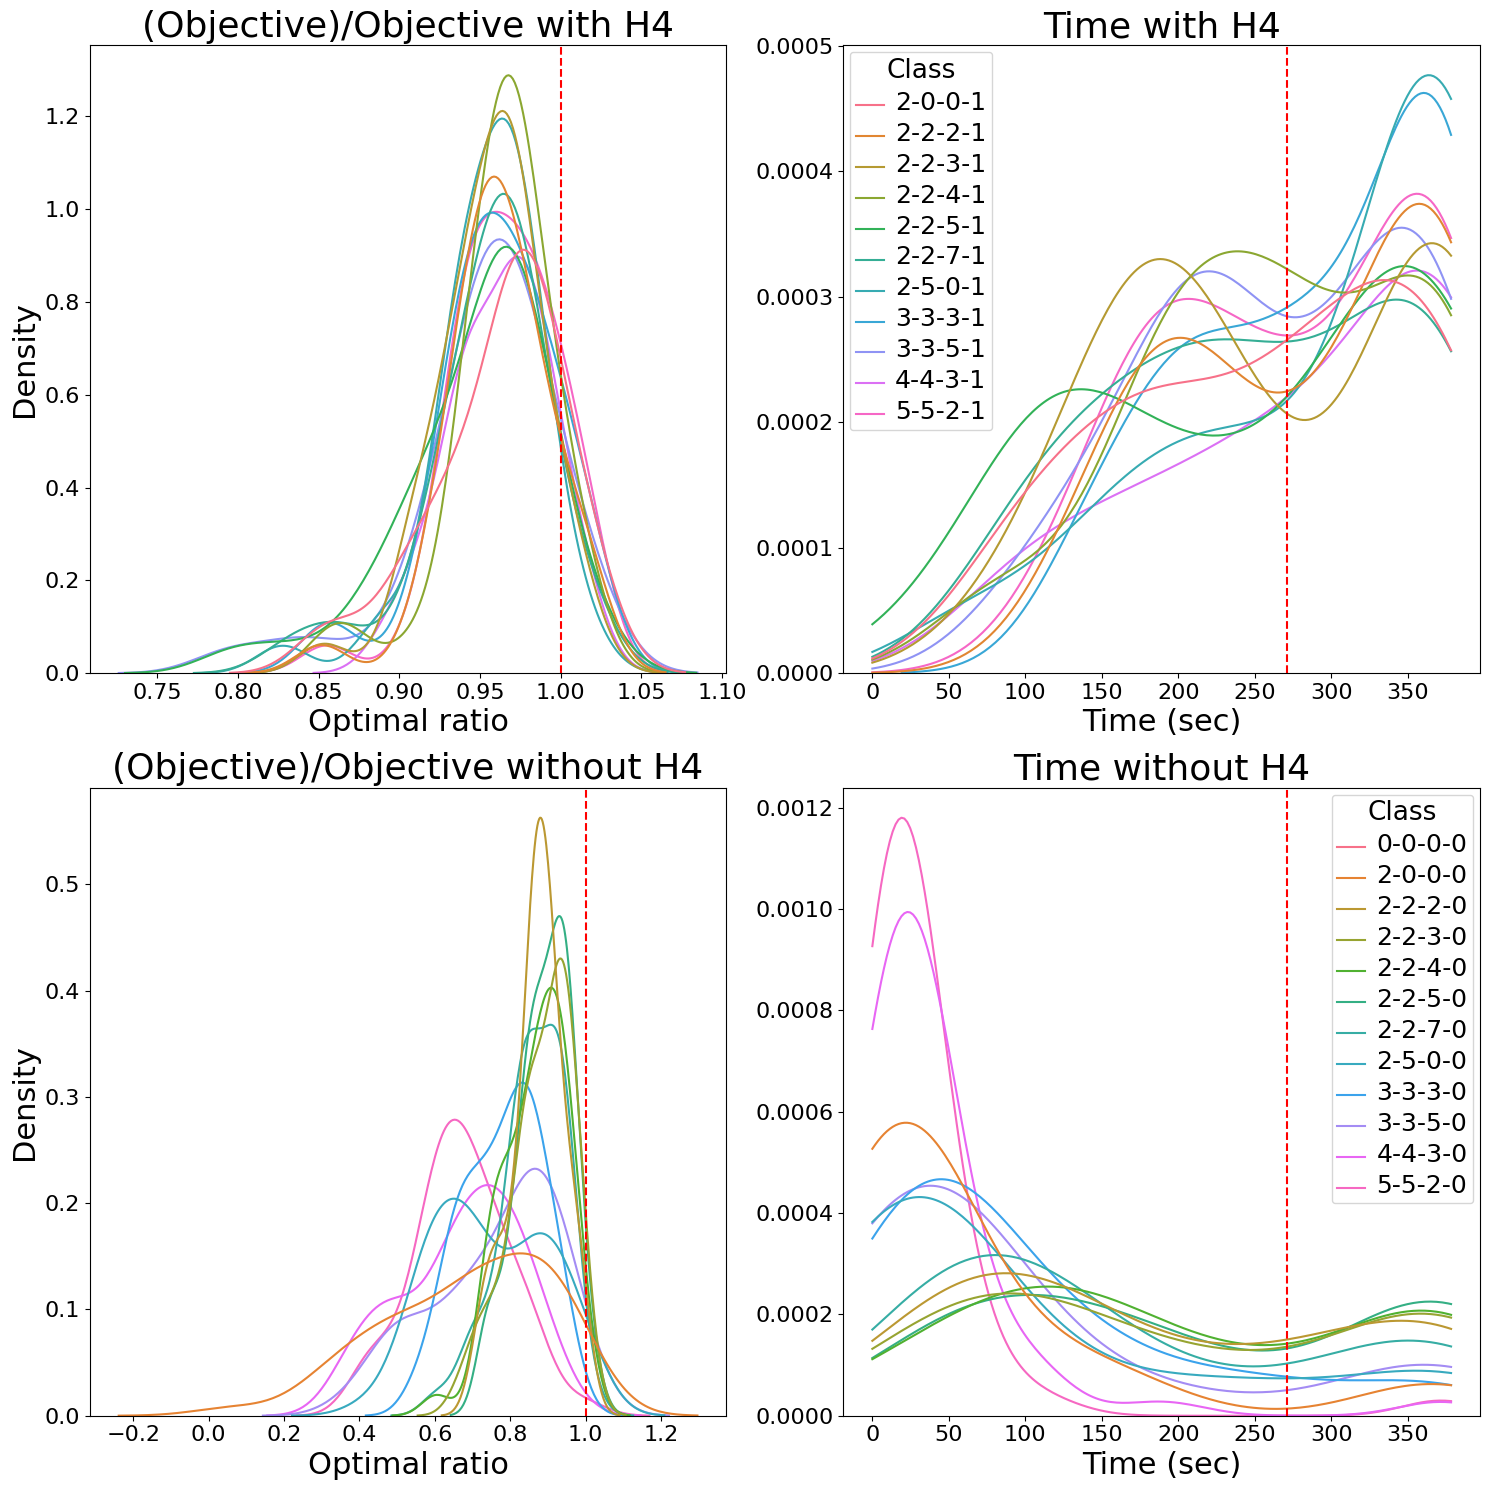

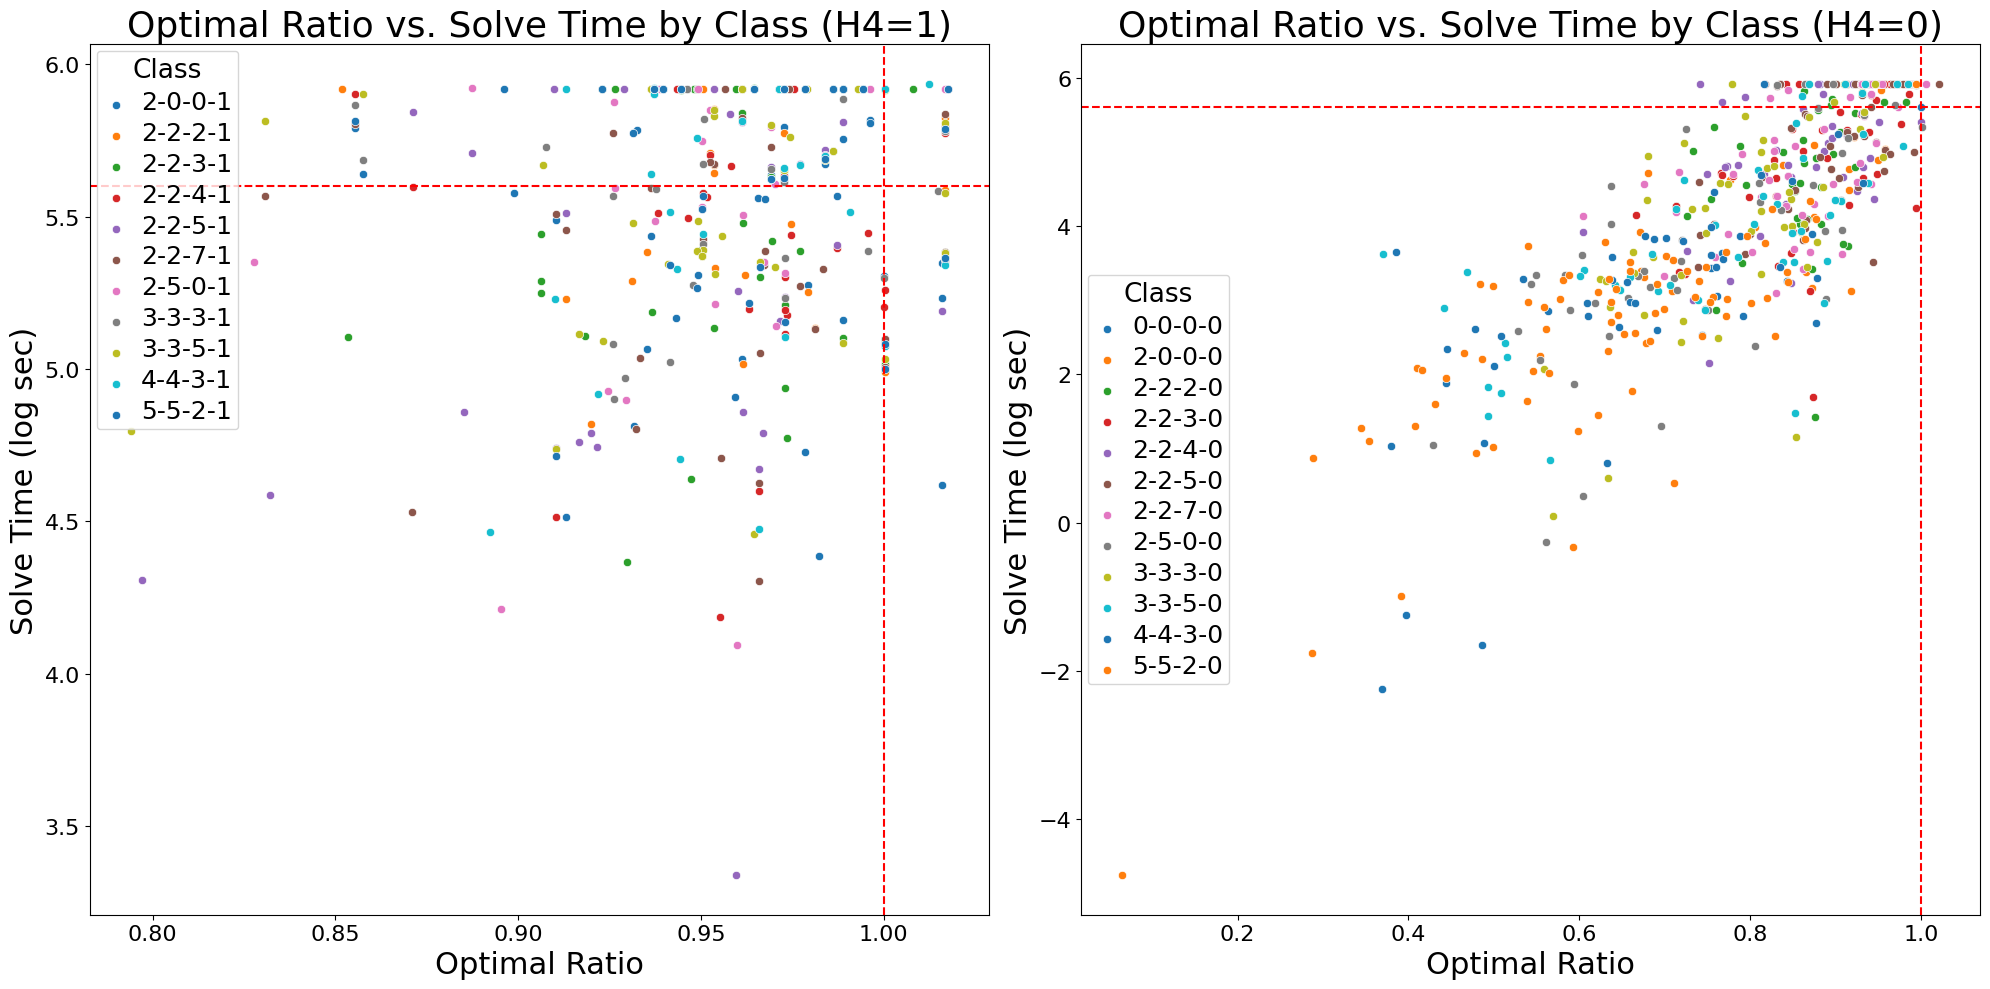

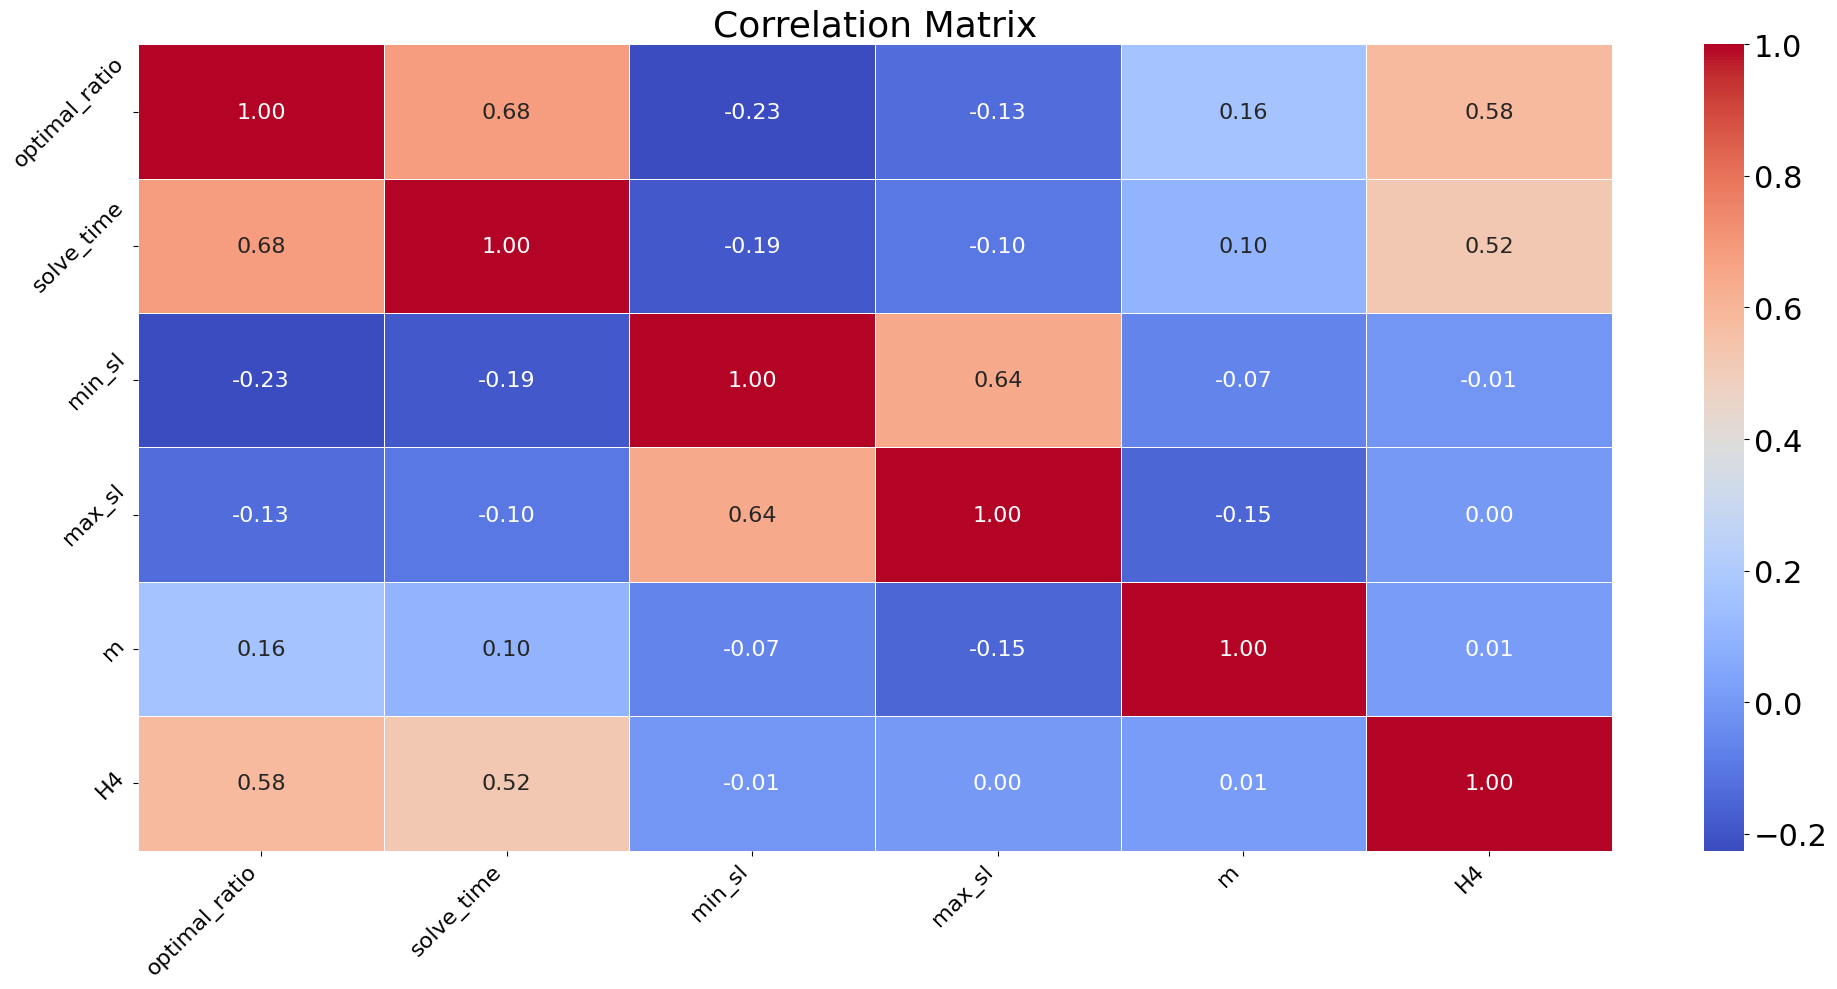

In [6]:
plot_kwargs = {
                'ticks_font_size':16,
               'label_font_size':22,
               'title_font_size':26,
               'legend_font_size':18,
               'fig_x_size':15,
               'fig_y_size':15,
              }

# p = edge_edge_variance_histplot(edge_value_df,problem_name,**plot_kwargs)
# plt.show()
# p = edge_edge_mean_histplot(edge_value_df,problem_name,**plot_kwargs)
# plt.show()
# p = flow_flow_variance_histplot(flow_value_df,problem_name,**plot_kwargs)
# plt.show()
# p = flow_flow_mean_histplot(flow_value_df,problem_name,**plot_kwargs)
# plt.show()
# p = objective_objective_histplot(meta_data_df,problem_name,**plot_kwargs)
# plt.show()
# p = time_histplot(meta_data_df,problem_name,**plot_kwargs)
# plt.show()
p=advance_plots(meta_data_df, problem_name, **plot_kwargs)
plt.show()
plot_kwargs['fig_x_size'] = 20
plot_kwargs['fig_y_size'] = 10
p=optimal_ratio_vs_time(meta_data_df, problem_name, **plot_kwargs, log_option=True)
plt.show()
p=correlation_matrix(meta_data_df, problem_name, **plot_kwargs)
plt.show()